# Predicting heart disease using machine learning

This notebook looks into using various Python-based machinr learning and data science libraries in an attempt 
to build a machine learning model capable of predicting wether or not someone has heart disease based on their
medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Definition

In a statement,
-> Given clinical parameters about a patient, can we predict whether or not they have a heart disease?

## 2. Data

The original data came from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on kaggle.
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

-> If we can reach 95% accuracy at predicting during the proof the concept, we'll pursue the project.

## 4. Features

Information about the columns/features.

**Create data dictionary**

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

## Preparing the tools

We're going to use `Pandas`, `Matplotlib`, `NumPy` for data manipulation and analysis.

In [2]:
# Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Models for scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve


## Load data

In [6]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data exploration (exploratory data analysis or EDA)

The goal here is to find the more info about the data.

1. What are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how to deal with it?
4. How can you add, change or remove features to get more of out of the data?

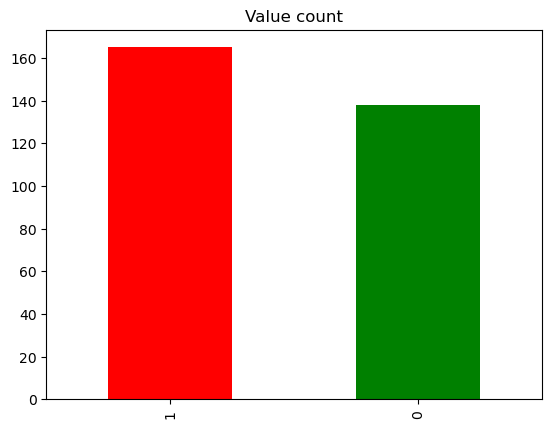

In [11]:
df['target'].value_counts().plot(kind='bar', color=['red', 'green'], title='Value count');

In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency accoroding to sex

In [15]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

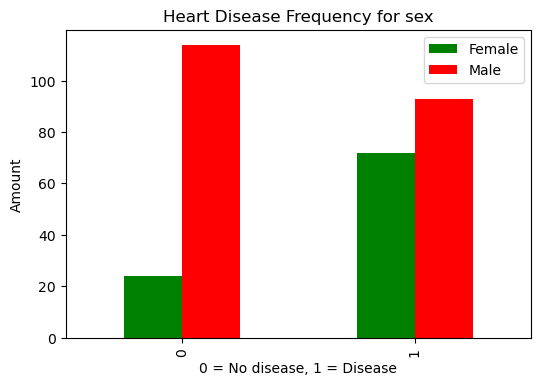

In [24]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(6, 4),
                                    color = ['green', 'red']);
plt.title('Heart Disease Frequency for sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male']);

In [20]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


### Age vs Max Heart Rate for heart disease

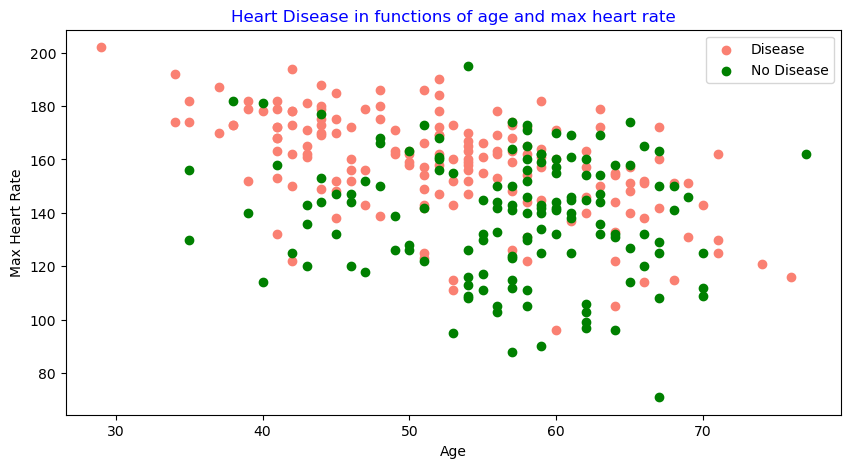

In [37]:
plt.figure(figsize=(10, 5))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon');


# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='green');

plt.title('Heart Disease in functions of age and max heart rate', color='blue')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

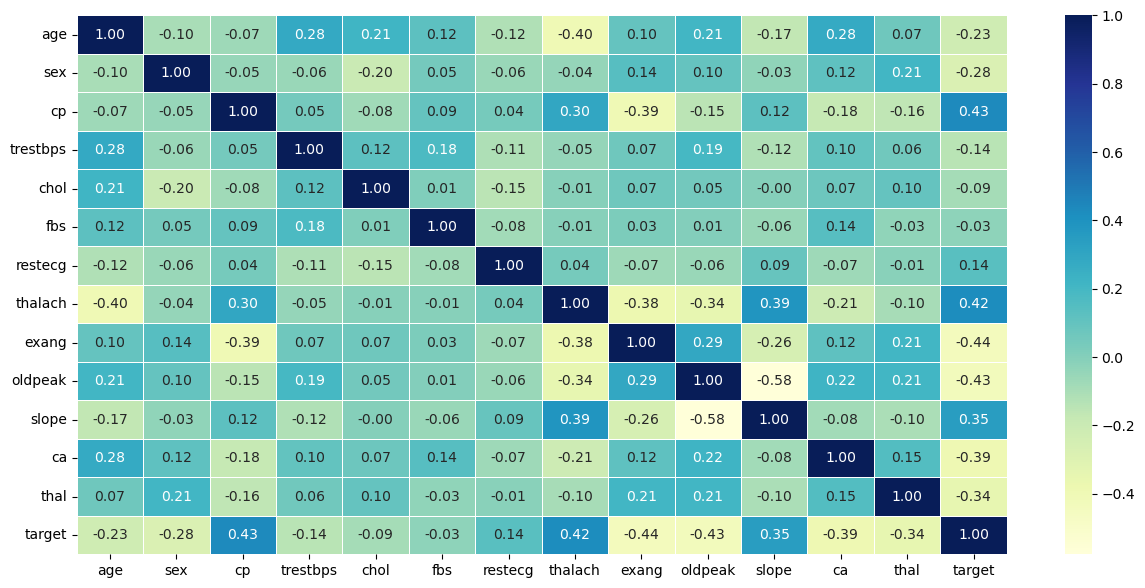

In [44]:
# Make a corelation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 7))

ax = sb.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu')

## An important article on corelation matrix - 
https://muthu.co/understanding-correlations-and-correlation-matrix/

## 5. Modeling

We're going to use three different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [53]:
# Split the data
X = df.drop('target', axis=1)
y = df['target']

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2)


In [56]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNC': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, xtrain, xtest, ytrain, ytest):
    '''
    Fit and evaluate the given machine learning models.
    models : a dictionary of different Scikit learn ML models 
    '''
    # Set random seed
    np.random.seed(42)
    # Make a dictionary 
    model_scores = {}
    
    for name, model in models.items():
        model.fit(xtrain, ytrain)
        model_scores[name] = model.score(xtest, ytest)
    return model_scores
    
    

In [58]:
ms = fit_and_score(models, x_train, x_test, y_train, y_test)
ms

/Users/tanbeerjubaer/Desktop/ml/heart-disease-project/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNC': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparision

In [60]:
model_compare = pd.DataFrame(ms, index=['accuracy'])
model_compare

,Logistic Regression,KNC,Random Forest
accuracy,0.885246,0.688525,0.836066


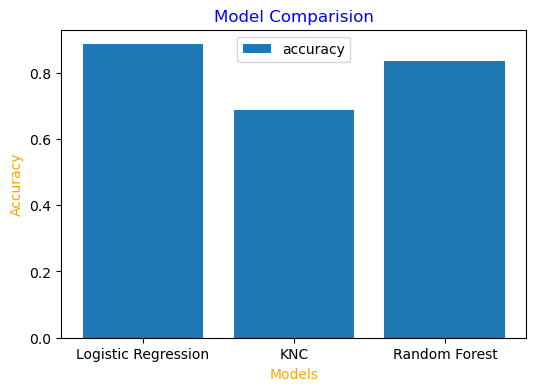

In [88]:
plt.subplots(figsize=(6, 4))
plt.bar(model_compare.columns, model_compare.iloc[0])
plt.title('Model Comparision', color='blue')
plt.ylabel('Accuracy', color='orange')
plt.legend(['accuracy'])
plt.xlabel('Models', color='orange');

### But we need to improve our model because still it is not 95% accurate.

Let's do the followings:

1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification report
9. ROC curve
10. Area under the curve (AUC)


### Hyperparameter tuning

In [90]:
# Let's tune KNN
train_scores = []
test_scores = []

neighbours = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [91]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [92]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

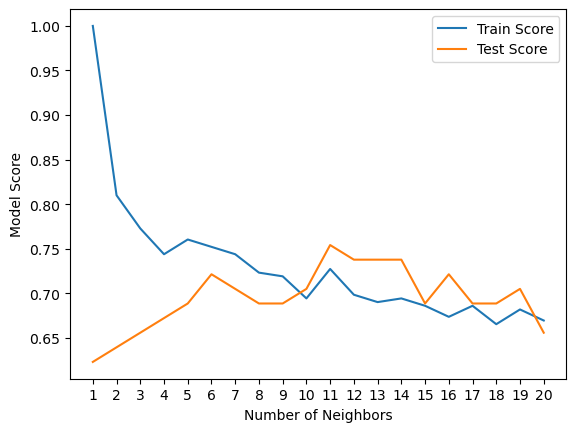

In [97]:
plt.plot(neighbours, train_scores, label='Train Score')
plt.plot(neighbours, test_scores, label='Test Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.xticks(np.arange(1, 21, 1))
plt.legend();

## Hyperparameter tuning with Randomized search CV 

We're going to tune Logistic Regression model and Random Forest classifier

In [113]:
# hyperparameter grid for Logistic Regression
log_grid = {'C': np.logspace(-4, 4, 20),
            'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 5, 6, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

In [114]:
rf_grid

{'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
        660, 710, 760, 810, 860, 910, 960]),
 'max_depth': [None, 5, 6, 10],
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

Now we've got hyperparameter grid let's tune them using Randomized Search CV

In [110]:
np.random.seed(42)

# Logistic Regression

# setup random hyperparameter for LR
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# fit the hyperparamter search model for LR

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [111]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [112]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

## Now try to tune the Random Forest classifier

In [115]:
np.random.seed(42)

# Random Forest Classifier


# setup random hyperparameter for RFC

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter for RFC

rs_rf.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [116]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [117]:
rs_rf.score(x_test, y_test)

0.8688524590163934

In [118]:
model_compare

,Logistic Regression,KNC,Random Forest
accuracy,0.885246,0.688525,0.836066


1. By hand
2. Randomized search CV
3. Grid search CV

## Hyperparameter using Grid search CV

In [126]:
log_grid

{'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
        1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
        1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
        2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
        2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
        3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
        4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
        5.29831691e+03, 1.00000000e+04]),
 'solver': ['liblinear']}

In [135]:
log_grid = {'C': np.logspace(-4, 4, 30),
            'solver': ['liblinear']}


# Logistic Regression

# setup grid hyperparameter for LR
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_grid,
                                cv=5,
                                verbose=True)
# fit the hyperparamter search model for LR

gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [136]:
gs_log_reg.best_params_, rs_log_reg.best_params_

({'C': 0.20433597178569418, 'solver': 'liblinear'},
 {'solver': 'liblinear', 'C': 0.23357214690901212})

In [137]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning model

1. ROC curve and AUC score
2. Confusion matrix
3. classification report
4. precision
5. recall 
6. f1-score

In [141]:
# make predictions
y_preds = gs_log_reg.predict(x_test)

In [151]:
# Calculate fpr, tpr and thresholds
fpr, tpr, threshold = roc_curve(y_test, y_preds)


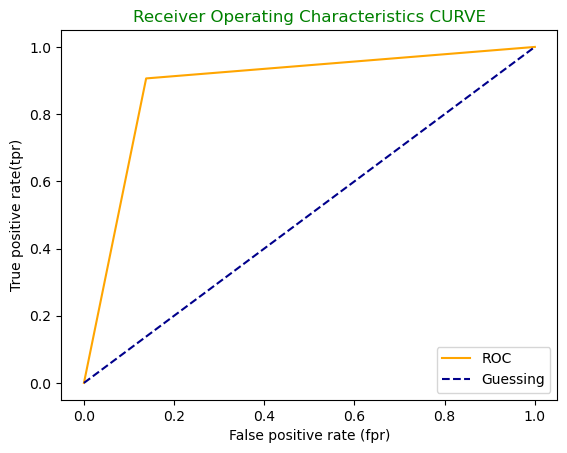

In [152]:
# Create a function for plotting ROC curves

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve using the given fpr and tpr of a model
    '''
    # Plot roc curve
    plt.plot(fpr, tpr, color='orange', label = 'ROC')
    
    # Plot baseline
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.title('Receiver Operating Characteristics CURVE', color='green')
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate(tpr)')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [155]:
# Confusion matrix
con_mat = confusion_matrix(y_test, y_preds)

Plots a confusion matrix using Seaborn's heatmap


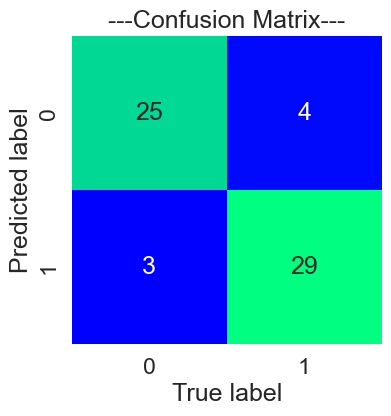

In [161]:
def plot_con_mat(con_mat):
    print('''Plots a confusion matrix using Seaborn's heatmap''')
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sb.heatmap(con_mat,
                    cmap='winter',
                    annot=True,
                    cbar=False)
    ax.set(title='---Confusion Matrix---',
           xlabel='True label',
           ylabel='Predicted label'
       );
    
plot_con_mat(con_mat)
# To understand it clearly consufion matrix anatomy will help. (ss is taken)

In [162]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_preds)

0.8841594827586207

In [163]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [164]:
# macro average doesn't count weight

## Calculate evaluation matrix using cross-validation

We'll us `cross_val_score`

In [166]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [184]:
mdl = LogisticRegression(C = 0.20433597178569418,
                         solver='liblinear')

In [170]:
# Cross-validated accuracy
cv_acc = cross_val_score(mdl,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc = np.mean(cv_acc)

In [172]:
# Cross-validated precision
cv_prec = cross_val_score(mdl,
                         X,
                         y,
                         cv=5,
                         scoring='precision')
cv_prec = np.mean(cv_prec)

In [173]:
# Cross-validated recall
cv_recall = cross_val_score(mdl,
                         X,
                         y,
                         cv=5,
                         scoring='recall')
cv_recall = np.mean(cv_recall)

In [175]:
# Cross-validated f1-score
cv_f1 = cross_val_score(mdl,
                         X,
                         y,
                         cv=5,
                         scoring='f1')
cv_f1 = np.mean(cv_f1)

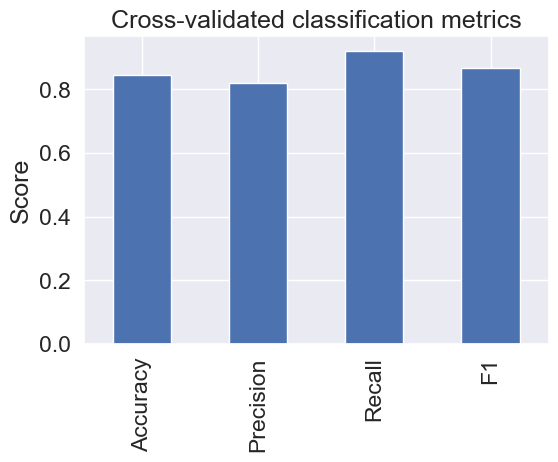

In [182]:
# Visualize cross-validated matrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_prec,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                     legend=False, ylabel='Score', figsize=(6, 4));

### Feature Importance

Which feature contributed the most on the outcome?

In [183]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [186]:
mdl = LogisticRegression(C = 0.20433597178569418,
                         solver='liblinear')
mdl.fit(x_train, y_train);

In [187]:
# Check coef
mdl.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [189]:
feature_dict = dict(zip(df.columns, list(mdl.coef_[0])))
feature_dict

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

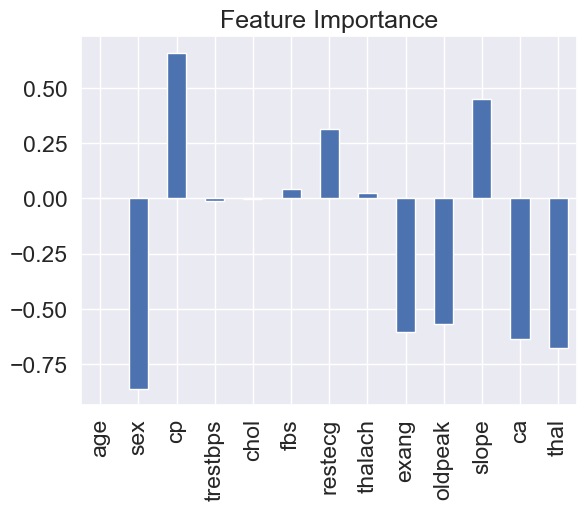

In [192]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [193]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [194]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
